<a href="https://colab.research.google.com/github/ethancma/forecasting/blob/main/CaseStudy_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# df = pd.read_csv('/content/sample_data/platform_3m_actuals_new.csv', index_col=0, parse_dates=True)
df = pd.read_csv('/content/sample_data/platform_3m_actuals_new.csv')

In [ ]:
sns.set(rc={'figure.figsize': (11, 4)})
df['datestamp'] = pd.to_datetime(df['datestamp'])
df.set_index('datestamp', inplace=True)

In [ ]:
new_df = df.head(11)

In [ ]:
train_data = new_df.iloc[::]
test_data = new_df.iloc[::]

In [ ]:
model = ARIMA(train_data['Bookings_3m'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()
model_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Bookings_3m   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -92.803
Date:                Thu, 13 Jul 2023   AIC                            191.607
Time:                        21:22:36   BIC                            192.514
Sample:                    10-31-2019   HQIC                           190.611
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6913      1.041     -0.664      0.507      -2.731       1.348
ma.L1          0.0971      1.414      0.069      0.945      -2.675       2.869
sigma2      6.728e+06   3.76e+06      1.789      0.074   -6.43e+05    1.41e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.71   Prob(JB):                         0.39
Heteroskedasticity (H):            5148.81   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = model_fit.forecast(steps=len(test_data))

In [ ]:
comparison = pd.DataFrame({'Actual': train_data['Bookings_3m'], 'Forecast': forecast})
print(comparison)


            Actual     Forecast
2019-10-31     4.0          NaN
2020-01-31    36.0          NaN
2020-04-30    29.0          NaN
2020-07-31   124.0          NaN
2020-10-31   724.0          NaN
2021-01-31  4135.0          NaN
2021-04-30  1586.0          NaN
2021-07-31  1102.0          NaN
2021-10-31  3424.0          NaN
2022-01-31  2433.0          NaN
2022-04-30  9657.0          NaN
2022-07-31     NaN  5294.196326
2022-10-31     NaN  8310.096336
2023-01-31     NaN  6225.278052
2023-04-30     NaN  7666.462197
2023-07-31     NaN  6670.206669
2023-10-31     NaN  7358.893871
2024-01-31     NaN  6882.821168
2024-04-30     NaN  7211.918642
2024-07-31     NaN  6984.421567
2024-10-31     NaN  7141.684759
2025-01-31     NaN  7032.972541


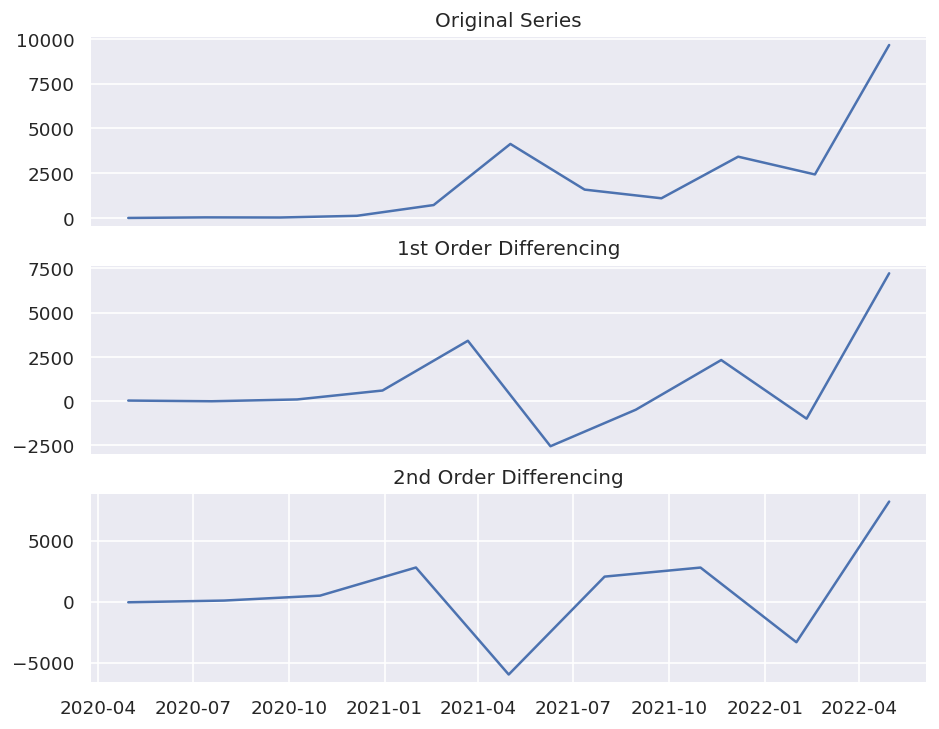

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(new_df.Bookings_3m); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(new_df.Bookings_3m.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(new_df.Bookings_3m.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

# SARIMA

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
model_2 = sm.tsa.SARIMAX(train_data['Bookings_3m'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))  # Adjust the order as needed
model_2_fit = model_2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_2 = model_2_fit.get_forecast(steps=len(test_data))
forecast_values = forecast_2.predicted_mean

In [ ]:
comparison_2 = pd.DataFrame({'Actual': test_data['Bookings_3m'], 'Forecast': forecast_values})
print(comparison_2)

            Actual     Forecast
2019-10-31     4.0          NaN
2020-01-31    36.0          NaN
2020-04-30    29.0          NaN
2020-07-31   124.0          NaN
2020-10-31   724.0          NaN
2021-01-31  4135.0          NaN
2021-04-30  1586.0          NaN
2021-07-31  1102.0          NaN
2021-10-31  3424.0          NaN
2022-01-31  2433.0          NaN
2022-04-30  9657.0          NaN
2022-07-31     NaN  5293.679728
2022-10-31     NaN  8310.373249
2023-01-31     NaN  6224.679775
2023-04-30     NaN  7666.667656
2023-07-31     NaN  6669.646608
2023-10-31     NaN  7358.483460
2024-01-31     NaN  6879.480827
2024-04-30     NaN  7210.789288
2024-07-31     NaN  6983.349407
2024-10-31     NaN  7139.163648
2025-01-31     NaN  7030.994606


# Max/Min Thresholds

In [ ]:
bookings = new_df['Bookings_3m']

In [ ]:
train_data_3 = bookings.iloc[::]
test_data_3 = bookings.iloc[::]

In [ ]:
model_3 = ARIMA(train_data_3, order=(1, 0, 1))  # Adjust the order as needed
model_3_fit = model_3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_3 = model_3_fit.forecast(steps=len(test_data))
forecast_3

2022-07-31    5226.499995
2022-10-31    4375.027840
2023-01-31    3761.054239
2023-04-30    3318.334437
2023-07-31    2999.101131
2023-10-31    2768.910605
2024-01-31    2602.926426
2024-04-30    2483.239713
2024-07-31    2396.936852
2024-10-31    2334.706187
2025-01-31    2289.833334
Freq: Q-OCT, Name: predicted_mean, dtype: float64

In [ ]:
max_threshold = 20000
min_threshold = 1000

In [ ]:
forecast_3_bounded = np.clip(forecast_3, min_threshold, max_threshold)

In [ ]:
comparison = pd.DataFrame({'Actual': test_data_3, 'Forecast': forecast_3_bounded})
print(comparison)

            Actual     Forecast
2019-10-31     4.0          NaN
2020-01-31    36.0          NaN
2020-04-30    29.0          NaN
2020-07-31   124.0          NaN
2020-10-31   724.0          NaN
2021-01-31  4135.0          NaN
2021-04-30  1586.0          NaN
2021-07-31  1102.0          NaN
2021-10-31  3424.0          NaN
2022-01-31  2433.0          NaN
2022-04-30  9657.0          NaN
2022-07-31     NaN  5226.499995
2022-10-31     NaN  4375.027840
2023-01-31     NaN  3761.054239
2023-04-30     NaN  3318.334437
2023-07-31     NaN  2999.101131
2023-10-31     NaN  2768.910605
2024-01-31     NaN  2602.926426
2024-04-30     NaN  2483.239713
2024-07-31     NaN  2396.936852
2024-10-31     NaN  2334.706187
2025-01-31     NaN  2289.833334


# Outliers Bound Detection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/sample_data/platform_3m_actuals_new.csv')
new2_df = df[df['Platform'] == '8k_Chassis']
data = new2_df['Bookings_3m'].values
data = data.astype(float)
upper_bound = np.max(data)
lower_bound = np.min(data)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))
target_variable = df['Bookings_3m'].values
model = LinearRegression()
model.fit(scaled_data, target_variable)

LinearRegression()

In [ ]:
new_data = pd.read_csv('/content/sample_data/platform_3m_actuals_new.csv')['Bookings_3m'].values
scaled_new_data = scaler.transform(new_data.reshape(-1, 1))
predictions = model.predict(scaled_new_data)

In [ ]:
for i in range(11):
    print(predictions[i])

4.0
36.0
29.000000000000004
124.0
724.0
4135.0
1585.9999999999998
1102.0
3424.0
2432.9999999999995
9657.0


# Testing for Unique/All Platforms

In [ ]:
# df[df['Platform'] == '8k_Chassis']
part_list = df['Platform'].unique().tolist()
for idx, part in enumerate(part_list):
    print(df[df['Platform'] == part_list[idx]]['Bookings_3m'].tolist())
    print(part)
    if idx == 2:
        break


[4.0, 36.0, 29.0, 124.0, 724.0, 4135.0, 1586.0, 1102.0, 3424.0, 2433.0, 9657.0]
8k_Chassis
[26.0, 146.0, 195.0, 1209.0, 4395.0, 1981.0, 2509.0, 5199.0, 5355.0, 13326.0]
8k_Fabric Card
[64.0, 26.0, 43.0, 288.0, 8927.0, 8687.0, 6053.0]
8k_Fixed Chassis


# Outlier Detection with Forecast

In [ ]:
QTR = ["Q1FY23", "Q2FY23", "Q3FY23", "Q4FY23"]

In [ ]:
import numpy as np
from scipy.stats import median_abs_deviation
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

In [ ]:
data = [4, 36, 29, 124, 724, 4135, 1586, 1102, 3424, 2433, 9657]
platform = ["8k_Chassis"]
# data = [4, 36, 29, 124, 724, 4135, 1586, 1102, 3424]
# data = [26, 146, 195, 1209, 4395, 1981, 2509, 5199, 5355, 13326]
# data = [26, 146, 195, 1209, 4395, 1981, 2509, 5199]
# data = [64,  26,  43,  288,  8927,  8687,  6053]

data = np.array(data)
mad = median_abs_deviation(data)
contamination = np.sum((np.abs(data - np.median(data))) > 3.5 * mad) / len(data)
if contamination > 0.5:
    contamination = 0.5
print(contamination)

num_future_steps = 4
X_train = np.arange(len(data)).reshape(-1, 1)
y_train = data.reshape(-1, 1)
X_future = np.arange(len(data), len(data) + num_future_steps).reshape(-1, 1)

outliers = []

if contamination > 0:
    model = IsolationForest(contamination=contamination)
    model.fit(data.reshape(-1, 1))
    outlier_status = model.predict(data.reshape(-1, 1))
    outliers = data[outlier_status == -1]
    data_no_outliers = data[outlier_status == 1]
    X_train = np.arange(len(data_no_outliers)).reshape(-1, 1)
    y_train = data_no_outliers.reshape(-1, 1)
    X_future = np.arange(len(data_no_outliers), len(data_no_outliers) + num_future_steps).reshape(-1, 1)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_future)
platforms = len(y_pred.flatten()) * platform
print("Detected outliers:", outliers)
print("Forecasted values:", y_pred.flatten())

0.09090909090909091
Detected outliers: [9657]
Forecasted values: [3317.66666667 3673.66060606 4029.65454545 4385.64848485]


In [ ]:
test = pd.DataFrame(columns=['Platform', 'Forecast_3m'])

In [ ]:
test['Forecast_3m'] = pd.Series(y_pred.flatten())
test['Platform'] = pd.Series(platforms)

,Platform,Forecast_3m
0,8k_Chassis,3317.666667
1,8k_Chassis,3673.660606
2,8k_Chassis,4029.654545
3,8k_Chassis,4385.648485


# Combined Outlier Detection Forecasting

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

In [ ]:
forecast_df = pd.DataFrame(columns=['Platform', 'Forecast_3m'])

In [ ]:
df = pd.read_csv('/content/sample_data/platform_3m_actuals_new.csv')

c = []
d = []
part_list = df['Platform'].unique().tolist()
for idx, part in enumerate(part_list):
    data = np.array(df[df['Platform'] == part_list[idx]]['Bookings_3m'].tolist())
    mad = median_abs_deviation(data)
    contamination = np.sum((np.abs(data - np.median(data))) > 3.5 * mad) / len(data)
    if contamination > 0.5:
        contamination = 0.5

    num_future_steps = 4
    X_train = np.arange(len(data)).reshape(-1, 1)
    y_train = data.reshape(-1, 1)
    X_future = np.arange(len(data), len(data) + num_future_steps).reshape(-1, 1)

    outliers = []
    if contamination > 0:
        model = IsolationForest(contamination=contamination)
        model.fit(data.reshape(-1, 1))
        outlier_status = model.predict(data.reshape(-1, 1))
        outliers = data[outlier_status == -1]
        data_no_outliers = data[outlier_status == 1]
        X_train = np.arange(len(data_no_outliers)).reshape(-1, 1)
        y_train = data_no_outliers.reshape(-1, 1)
        X_future = np.arange(len(data_no_outliers), len(data_no_outliers) + num_future_steps).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_future)
    platforms = len(y_pred.flatten()) * part
    c.extend(y_pred.flatten())
    d.extend([part] * len(y_pred.flatten()))


In [ ]:
#pd.Series(c)
#pd.Series(d)
forecast_df['Forecast_3m'] = pd.Series(c)
forecast_df['Platform'] = pd.Series(d)
forecast_df

In [ ]:
from google.colab import files
forecast_df.to_csv('test.csv', encoding='utf-8')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>